In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/Ruter-data.csv"

df = pd.read_csv(url, sep=';')

In [3]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [4]:
kolonneListe= ['Dato', 'Linjenavn', 'Passasjerer_Ombord'];

In [5]:
df=df[kolonneListe]

In [6]:
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10


In [7]:
#%% md We will use bus 100 for our algorithm

In [8]:
df = df.loc[df['Linjenavn'] == "100"];

In [9]:
df.head()

,Dato,Linjenavn,Passasjerer_Ombord
38,09/08/2020,100,1
42,18/08/2020,100,0
43,20/07/2020,100,7
46,04/07/2020,100,13
51,22/07/2020,100,0


In [10]:
#%% md Some buses have a negative number of passengers, as we saw in Oblig 1. We'll set these negative values to 0.

In [11]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])


In [12]:
#%% md Next we'll convert the date to datetime, and add up how many people were on the busline for each date.

In [13]:
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')
df['DatoOrdinal']=df['Dato'].map(dt.datetime.toordinal)

In [14]:
print(df.groupby(['DatoOrdinal']).sum("Passasjerer_Ombord"))

             Passasjerer_Ombord
DatoOrdinal                    
737577                       17
737578                       38
737579                       50
737580                       66
737581                       10
...                         ...
737663                       77
737664                       42
737665                       40
737666                       17
737667                       21

[90 rows x 1 columns]


In [15]:
df_runner=df.groupby(df['DatoOrdinal'], as_index=False).aggregate({'Passasjerer_Ombord':'sum'})
df_runner

,DatoOrdinal,Passasjerer_Ombord
0,737577,17
1,737578,38
2,737579,50
3,737580,66
4,737581,10
...,...,...
85,737663,77
86,737664,42
87,737665,40
88,737666,17


<AxesSubplot:xlabel='DatoOrdinal', ylabel='Passasjerer_Ombord'>

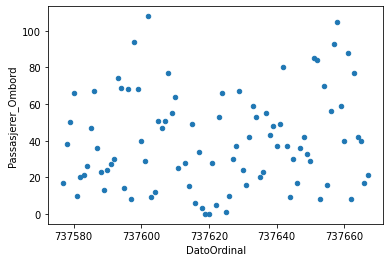

In [19]:
df_runner.plot.scatter(x = 'DatoOrdinal', y = 'Passasjerer_Ombord' )

In [ ]:
#%% md There doesnt seem to be any particular correlation between the passengers each day. We will just use linear regression to try to predict how many people will be on the bus on a given day.

In [20]:
X = pd.DataFrame(df_runner["DatoOrdinal"]) #DATO
y = pd.DataFrame(df_runner["Passasjerer_Ombord"]) #ANTALL PASSASJERER

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

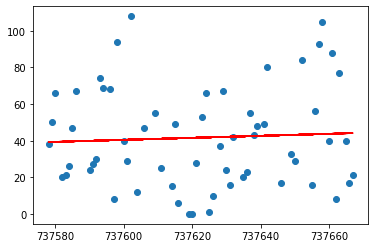

MSE = 738.1677805906237


In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

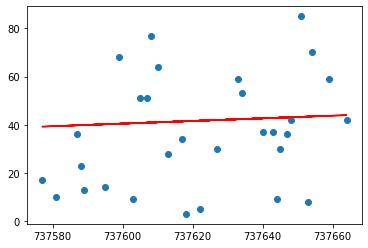

MSE = 527.4175193231298


In [24]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [25]:
linear_regressor.predict([[737577]])

array([[39.20897124]])

In [26]:
#%% md Choose a date in the format dd/mm/YY 
givenDay = "01/06/2020"
givenDay=pd.to_datetime(givenDay, format='%d/%m/%Y')
givenDay = givenDay.toordinal()
linear_regressor.predict([[givenDay]])

array([[39.20897124]])

In [27]:
# We can see that this isn't very accurate, so we will make a new one algorithm based on the amount of people each weekday.
# Hopefully this will be more accurate.

df2 = pd.read_csv(url, sep=';')

In [28]:
# We will use code from Oblig 1 to extract the days of the week.
df2['Dato'] = pd.to_datetime(df2['Dato'])

df2['Ukedag'] = df2['Dato'].dt.day_name()

conditions = [
    (df2['Ukedag'] == "Monday"),
    (df2['Ukedag'] == "Tuesday"),
    (df2['Ukedag'] == "Wednesday"),
    (df2['Ukedag'] == "Thursday"),
    (df2['Ukedag'] == "Friday"),
    (df2['Ukedag'] == "Saturday"),
    (df2['Ukedag'] == "Sunday"),
    ]

ukedagArray = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag']

df2['Ukedag'] = np.select(conditions, ukedagArray)
df2

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,Torsdag
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,Lørdag
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,Søndag
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,Mandag
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,Torsdag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2,Tirsdag
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2,Tirsdag
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3,Fredag
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5,Torsdag


In [29]:
df2 = df2.loc[df2['Linjenavn'] == "100"];

In [30]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])


In [31]:
mandag=  df2[df2['Ukedag'].str.contains("Mandag")].Passasjerer_Ombord.sum()
tirsdag= df2[df2['Ukedag'].str.contains("Tirsdag")].Passasjerer_Ombord.sum()
onsdag= df2[df2['Ukedag'].str.contains("Onsdag")].Passasjerer_Ombord.sum()
torsdag= df2[df2['Ukedag'].str.contains("Torsdag")].Passasjerer_Ombord.sum()
fredag= df2[df2['Ukedag'].str.contains("Fredag")].Passasjerer_Ombord.sum()
lørdag= df2[df2['Ukedag'].str.contains("Lørdag")].Passasjerer_Ombord.sum()
søndag = df2[df2['Ukedag'].str.contains("Søndag")].Passasjerer_Ombord.sum()
Antall_PassasjererIUke = {'Ukedag': [0, 1, 2, 3, 4, 5, 6],
        'Passasjerer_Per_Ukedag': [mandag, tirsdag, onsdag, torsdag, fredag, lørdag, søndag],'Dag': ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag", 'Lørdag','Søndag'],
       }

df2 = pd.DataFrame(Antall_PassasjererIUke , columns = ['Ukedag', 'Passasjerer_Per_Ukedag', 'Dag'])
df2


,Ukedag,Passasjerer_Per_Ukedag,Dag
0,0,567,Mandag
1,1,477,Tirsdag
2,2,420,Onsdag
3,3,473,Torsdag
4,4,728,Fredag
5,5,493,Lørdag
6,6,284,Søndag


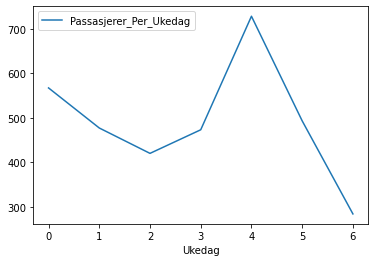

In [32]:
ax1 = df2.plot('Ukedag','Passasjerer_Per_Ukedag')    

In [33]:
X = pd.DataFrame(df2["Ukedag"]) #DATO
y = pd.DataFrame(df2["Passasjerer_Per_Ukedag"]) #ANTALL PASSASJERER

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
linear_regressor = numpy.poly1d(numpy.polyfit(x, y, 3))
#linear_regressor.fit(X_train, y_train)
#Y_pred = linear_regressor.predict(X_train)

NameError: name 'numpy' is not defined

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))